In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

%matplotlib inline

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
print(train.shape)
print(test.shape)

(20930, 32)
(5909, 31)


In [5]:
train.columns

Index(['Time', 'E_Status', 'B_Depth', 'A_Depth', 'E_Speed', 'F_Consump',
       'G_Status', 'B_PRES', 'B_FLAG', 'LAT_ACCEL', 'LONG_ACCEL', 'YAW_RATE',
       'S_Angle', 'WHL_SPD_FL', 'WHL_SPD_FR', 'WHL_SPD_RL', 'WHL_SPD_RR',
       'HL_High', 'HL_Low', 'DriveMode', 'Out_Temp', 'F_Economy', 'HevMode',
       'E_Col_Temp', 'Inhibit_D', 'Inhibit_N', 'Inhibit_P', 'Inhibit_R',
       'V_Speed', 'Odometer', 'BA_SoC', 'case'],
      dtype='object')

In [6]:
test.columns

Index(['Time', 'E_Status', 'B_Depth', 'A_Depth', 'E_Speed', 'G_Status',
       'B_PRES', 'B_FLAG', 'LAT_ACCEL', 'LONG_ACCEL', 'YAW_RATE', 'S_Angle',
       'WHL_SPD_FL', 'WHL_SPD_FR', 'WHL_SPD_RL', 'WHL_SPD_RR', 'HL_High',
       'HL_Low', 'DriveMode', 'Out_Temp', 'F_Economy', 'HevMode', 'E_Col_Temp',
       'Inhibit_D', 'Inhibit_N', 'Inhibit_P', 'Inhibit_R', 'V_Speed',
       'Odometer', 'BA_SoC', 'case'],
      dtype='object')

In [53]:
target = ['F_Consump']

In [54]:
train.head(10)

,Time,E_Status,B_Depth,A_Depth,E_Speed,F_Consump,G_Status,B_PRES,B_FLAG,LAT_ACCEL,...,E_Col_Temp,Inhibit_D,Inhibit_N,Inhibit_P,Inhibit_R,V_Speed,Odometer,BA_SoC,case,case_2
0,1632708708,1,0,0.0,1298,6.375551,0,0.0,0,0.011910,...,69,0,0,1,0,0,0,100,1,1.0
1,1632708716,0,0,0.0,2,0.000000,0,0.0,0,0.019740,...,69,0,0,1,0,0,0,100,1,1.0
2,1632708717,0,0,0.0,0,0.000000,0,0.0,0,0.022235,...,69,0,0,1,0,0,0,100,1,1.0
3,1632708718,0,0,0.0,0,0.000000,0,0.0,0,0.026534,...,69,0,0,1,0,0,0,100,1,1.0
4,1632708719,0,0,0.0,0,0.000000,0,0.0,0,0.020452,...,69,0,0,1,0,0,0,100,1,1.0
5,1632708720,0,0,0.0,0,0.000000,0,0.0,0,0.023477,...,69,0,0,1,0,0,0,100,1,1.0
6,1632708721,0,0,0.0,0,0.000000,0,0.0,0,0.025339,...,69,0,0,1,0,0,0,100,1,1.0
7,1632708722,0,0,0.0,0,0.000000,0,0.0,0,0.023073,...,69,0,0,1,0,0,0,100,1,1.0
8,1632708723,0,0,0.0,0,0.000000,0,0.0,0,0.022422,...,69,0,0,1,0,0,0,100,1,1.0
9,1632708724,0,0,0.0,0,0.000000,0,0.0,0,0.027896,...,69,0,0,1,0,0,0,100,1,1.0


In [55]:
train.describe()

,Time,E_Status,B_Depth,A_Depth,E_Speed,F_Consump,G_Status,B_PRES,B_FLAG,LAT_ACCEL,...,HevMode,E_Col_Temp,Inhibit_D,Inhibit_N,Inhibit_P,Inhibit_R,V_Speed,Odometer,BA_SoC,case_2
count,2.093000e+04,20930.000000,20930.000000,20930.000000,20930.000000,20930.000000,20930.000000,20930.000000,20930.000000,20930.000000,...,20930.000000,20930.000000,20930.000000,20930.000000,20930.000000,20930.000000,20930.000000,20930.000000,20930.000000,20930.000000
mean,1.633457e+09,0.362972,9.881653,10.231362,595.925084,4.155664,3.135643,3.274548,0.085619,0.069518,...,4.937219,80.458528,0.961061,0.015050,0.015194,0.006068,37.453321,37.453321,83.446154,1.712136
std,8.505994e+05,0.533887,19.322326,14.155013,855.573374,6.384609,1.819195,8.591231,0.279807,0.425388,...,2.704536,14.291262,0.193455,0.121755,0.122325,0.077662,30.078828,30.078828,4.761129,0.714371
min,1.632709e+09,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-3.176870,...,0.000000,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,79.000000,1.000000
25%,1.632714e+09,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,-0.030416,...,3.000000,73.000000,1.000000,0.000000,0.000000,0.000000,8.000000,8.000000,80.000000,1.000000
50%,1.632972e+09,0.000000,0.000000,0.158254,0.000000,0.000000,3.000000,0.000000,0.000000,0.118364,...,5.000000,87.000000,1.000000,0.000000,0.000000,0.000000,35.000000,35.000000,81.000000,2.000000
75%,1.633999e+09,1.000000,10.000000,18.750642,1559.000000,10.045473,5.000000,0.824032,0.000000,0.222593,...,6.000000,90.000000,1.000000,0.000000,0.000000,0.000000,65.000000,65.000000,85.000000,2.000000
max,1.634796e+09,5.000000,145.000000,75.417162,3685.000000,56.201705,6.000000,86.792945,1.000000,3.965008,...,9.000000,96.000000,1.000000,1.000000,1.000000,1.000000,114.000000,114.000000,100.000000,3.000000


In [56]:
catg_feature = ['Inhibit_R', 'Inhibit_P', 'Inhibit_N', 'Inhibit_D', 'G_Status', 
                'E_Status', 'HevMode', 'DriveMode', 'HL_Low', 'HL_High','B_FLAG']
                
train[catg_feature]

num_feature = list(set(train.columns) - set(catg_feature))

In [57]:


train.drop('case_2', axis =1)

,Time,E_Status,B_Depth,A_Depth,E_Speed,F_Consump,G_Status,B_PRES,B_FLAG,LAT_ACCEL,...,HevMode,E_Col_Temp,Inhibit_D,Inhibit_N,Inhibit_P,Inhibit_R,V_Speed,Odometer,BA_SoC,case
0,1632708708,1,0,0.0,1298,6.375551,0,0.000000,0,0.011910,...,1,69,0,0,1,0,0,0,100,1
1,1632708716,0,0,0.0,2,0.000000,0,0.000000,0,0.019740,...,0,69,0,0,1,0,0,0,100,1
2,1632708717,0,0,0.0,0,0.000000,0,0.000000,0,0.022235,...,0,69,0,0,1,0,0,0,100,1
3,1632708718,0,0,0.0,0,0.000000,0,0.000000,0,0.026534,...,0,69,0,0,1,0,0,0,100,1
4,1632708719,0,0,0.0,0,0.000000,0,0.000000,0,0.020452,...,0,69,0,0,1,0,0,0,100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20925,1632714279,0,3,0.0,0,0.000000,2,0.000000,0,0.250357,...,6,89,1,0,0,0,3,3,83,1
20926,1632714280,0,9,0.0,0,0.000000,2,1.355161,0,0.334903,...,6,89,1,0,0,0,3,3,83,1
20927,1632714281,0,28,0.0,0,0.000000,2,4.316322,0,0.076198,...,6,89,1,0,0,0,2,2,83,1
20928,1632714282,0,37,0.0,0,0.000000,1,9.162969,0,-0.202344,...,6,89,1,0,0,0,0,0,83,1


In [58]:

train.loc[train['case']=='J', 'case'] = 1
train.loc[train['case']=='K', 'case'] = 2
train.loc[train['case']=='O', 'case'] = 3

In [59]:
train[num_feature+target]

,Time,case_2,A_Depth,LONG_ACCEL,YAW_RATE,S_Angle,BA_SoC,case,B_PRES,V_Speed,...,WHL_SPD_RR,WHL_SPD_FR,E_Speed,F_Economy,Odometer,WHL_SPD_FL,Out_Temp,E_Col_Temp,B_Depth,F_Consump
0,1632708708,1.0,0.0,0.058427,0.031910,8.535393,100,1,0.000000,0,...,0.000000,0.000000,1298,2.664904,0,0.000000,31,69,0,6.375551
1,1632708716,1.0,0.0,0.060114,0.037110,8.556169,100,1,0.000000,0,...,0.000000,0.011769,2,33.552330,0,0.000000,31,69,0,0.000000
2,1632708717,1.0,0.0,0.064735,0.024497,8.539425,100,1,0.000000,0,...,0.000000,0.031250,0,33.882353,0,0.000000,31,69,0,0.000000
3,1632708718,1.0,0.0,0.066012,0.037261,8.522656,100,1,0.000000,0,...,0.000000,0.031250,0,33.882353,0,0.000000,31,69,0,0.000000
4,1632708719,1.0,0.0,0.068253,0.029045,8.537048,100,1,0.000000,0,...,0.000000,0.031250,0,33.882353,0,0.000000,31,69,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20925,1632714279,1.0,0.0,-0.017341,1.608413,67.156905,83,1,0.000000,3,...,4.302657,4.314984,0,33.882353,3,4.167106,29,89,3,0.000000
20926,1632714280,1.0,0.0,0.075129,5.441161,187.974516,83,1,1.355161,3,...,4.561371,4.652560,0,33.882353,3,4.149657,29,89,9,0.000000
20927,1632714281,1.0,0.0,-0.328326,6.647996,243.178926,83,1,4.316322,2,...,4.181818,4.331224,0,33.882353,2,3.703254,29,89,28,0.000000
20928,1632714282,1.0,0.0,-0.825484,2.362266,245.291687,83,1,9.162969,0,...,1.833407,1.929972,0,33.882353,0,1.690183,29,89,37,0.000000


<AxesSubplot:>

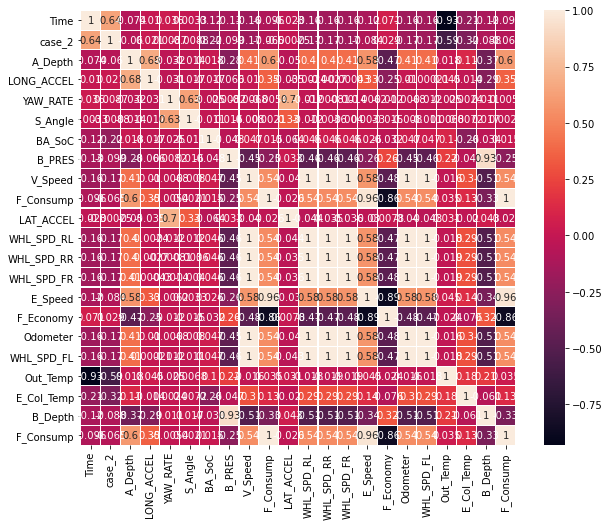

In [62]:
plt.figure(figsize=(20, 20)) 

sns.heatmap(train[num_feature+target].corr(), linewidths = 0.1, vmax = 1.0, 
            square = True, linecolor = "white", annot = True)


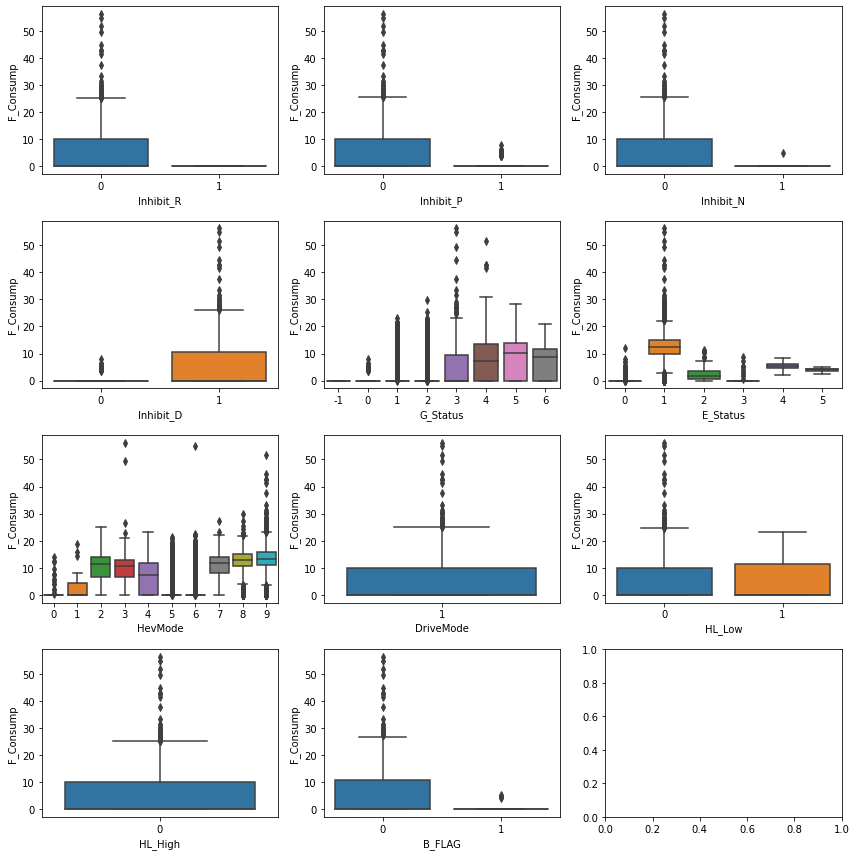

In [65]:
list_catg_feats = catg_feature

nr_rows = 4
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4, nr_rows*3))

for r in range(0, nr_rows) :
    for c in range(0, nr_cols) : 
        i = r*nr_cols+c 
        if i < len(list_catg_feats) : 
            sns.boxplot(x=list_catg_feats[i], y=train['F_Consump'], data = train, ax = axs[r][c])
            
plt.tight_layout()
plt.show()



<AxesSubplot:xlabel='case', ylabel='F_Consump'>

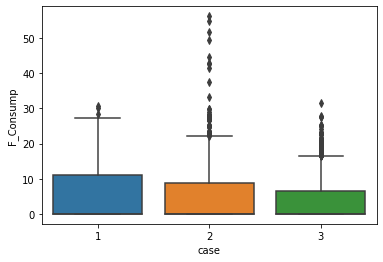

In [107]:
sns.boxplot(x='case', y=train['F_Consump'], data = train)

In [108]:
catg_weak_feat =['DriveMode', 'HL_High', 'HL_Low']

catg_feature.append('case')

In [110]:
catg_feature = ['Inhibit_R', 'Inhibit_P','Inhibit_N', 'Inhibit_D',
                'G_Status',  'E_Status',  'HevMode', 'B_FLAG', 'case']

In [113]:
del num_feature[1]

In [115]:
del num_feature[6]

In [116]:
num_feature

['Time',
 'A_Depth',
 'LONG_ACCEL',
 'YAW_RATE',
 'S_Angle',
 'BA_SoC',
 'B_PRES',
 'V_Speed',
 'F_Consump',
 'LAT_ACCEL',
 'WHL_SPD_RL',
 'WHL_SPD_RR',
 'WHL_SPD_FR',
 'E_Speed',
 'F_Economy',
 'Odometer',
 'WHL_SPD_FL',
 'Out_Temp',
 'E_Col_Temp',
 'B_Depth']

<AxesSubplot:>

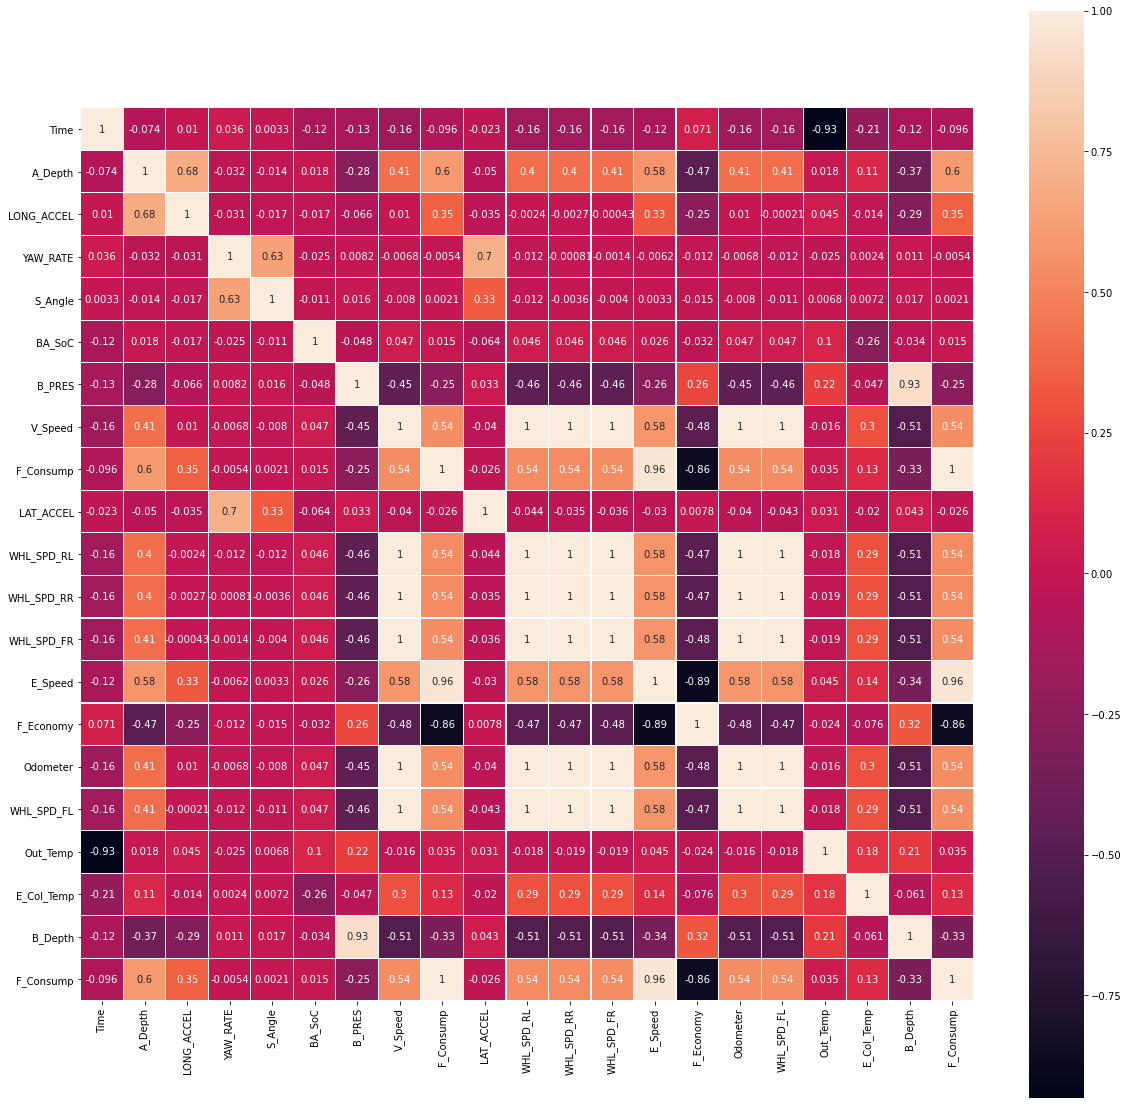

In [117]:
plt.figure(figsize=(20, 20)) 

sns.heatmap(train[num_feature+target].corr(), linewidths = 0.1, vmax = 1.0, 
            square = True, linecolor = "white", annot = True)

In [121]:
num_strong_feat = ['E_Speed','F_Economy','A_Depth', 'V_Speed', 'WHL_SPD_RL', 'WHL_SPD_RR', 'WHL_SPD_FR', 'WHL_SPD_FL','Odometer']
#0.3~0.5
num_weak_feat = ['LONG_ACCEL', 'B_Depth','']
#num_ignore_feat = 

<AxesSubplot:>

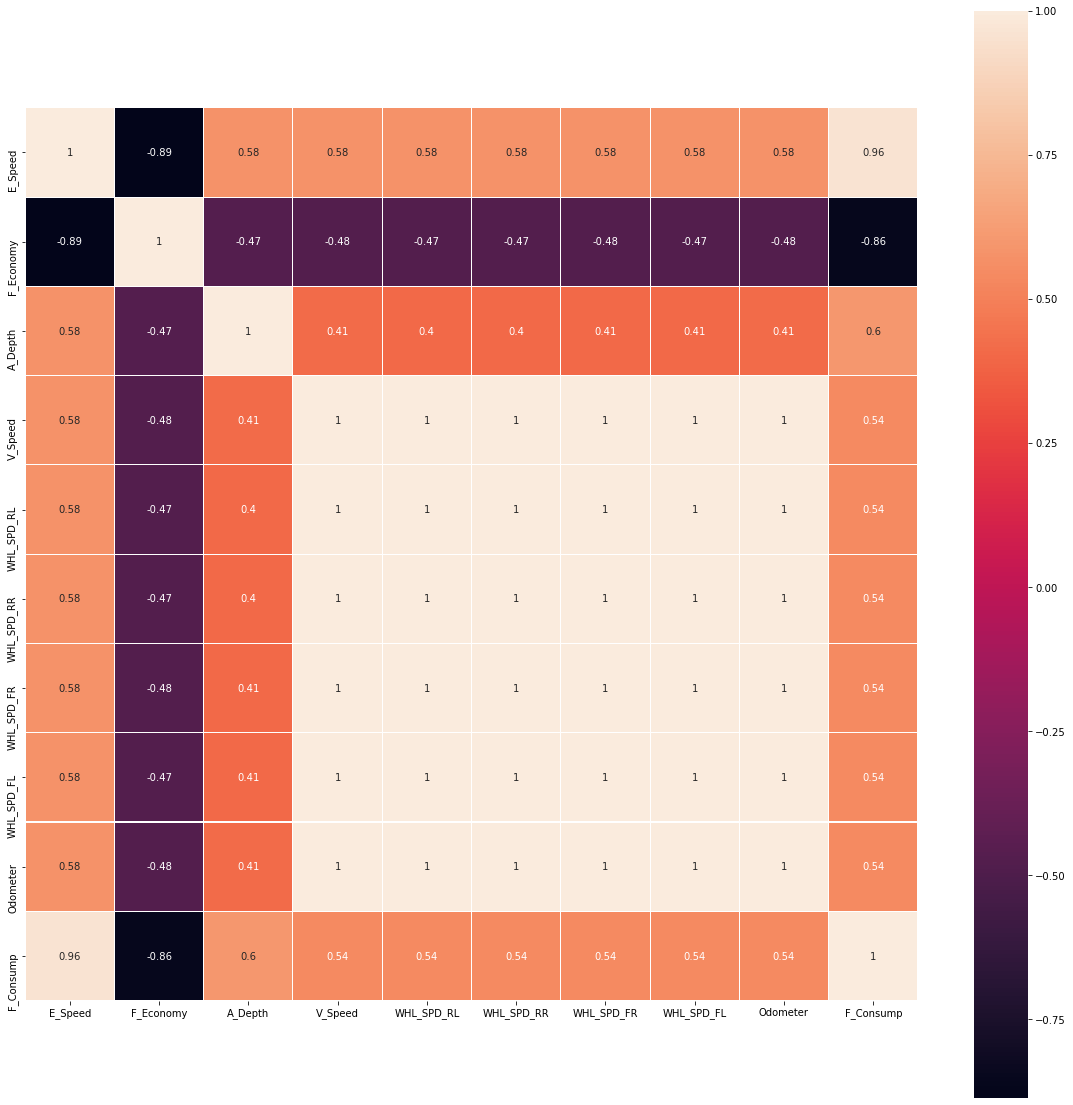

In [122]:
plt.figure(figsize=(20, 20)) 

sns.heatmap(train[num_strong_feat+target].corr(), linewidths = 0.1, vmax = 1.0, 
            square = True, linecolor = "white", annot = True)

In [123]:
# V_speed - Odometer , WHL SPD V Spped 다중 공선성  확인 
num_strong_feat = ['E_Speed','F_Economy','A_Depth', 'V_Speed','Odometer']

<AxesSubplot:xlabel='Out_Temp', ylabel='F_Consump'>

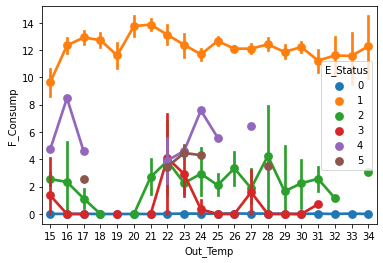

In [127]:
sns.pointplot(data=train, x='Out_Temp', y='F_Consump', hue='E_Status')

In [135]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import train_test_split

X_train = train[num_strong_feat+catg_feature]
y_train = train[target]

X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, y_train, test_size=0.2, random_state=37)

model = RandomForestRegressor(n_estimators = 50, min_samples_split=5, random_state = 37)

In [165]:
X_train['case'] = pd.to_numeric(X_train['case'])

<ipython-input-165-1732ddd919f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['case'] = pd.to_numeric(X_train['case'])


In [166]:
X_train['case']

0        1
1        1
2        1
3        1
4        1
        ..
20925    1
20926    1
20927    1
20928    1
20929    1
Name: case, Length: 20930, dtype: int64

In [136]:
model.fit(X_tr, y_tr)

<ipython-input-136-0f34704c5210>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_tr, y_tr)


RandomForestRegressor(min_samples_split=5, n_estimators=50, random_state=37)

In [137]:
model.score(X_tr, y_tr)

0.9895916982882076

In [138]:
model.score(X_vld, y_vld)

0.9530530014330416

In [140]:
pred = model.predict(X_vld)

In [142]:
from sklearn.metrics import accuracy_score

accuracy_score(y_vld, pred)

ValueError: continuous is not supported

In [149]:
from sklearn.model_selection import GridSearchCV

params = { 'n_estimators' : [10, 50],
           'max_depth' : [6, 8, 10],
           'min_samples_split' : [5, 10, 15]
            }

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_model = RandomForestRegressor(random_state = 37, n_jobs = -1)
grid_cv = GridSearchCV(rf_model, param_grid = params, cv = 3, n_jobs = -1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


최적 하이퍼 파라미터:  {'max_depth': 8, 'min_samples_split': 5, 'n_estimators': 100}
최고 예측 정확도: 0.9509


In [171]:
import xgboost

xg_params = { 'n_estimators' : [10, 50, 100],
           'learning_rate' : [0.1],
             'max_depth' : [3, 6],
             'gamma' : [0, 1],
           'colsample_bytree' : [0.4603, 1],
             'nthread' : [-1],
            }

xgb_model = xgboost.XGBRegressor(random_state = 37, n_jobs = -1)
grid_cv = GridSearchCV(xgb_model, param_grid = xg_params, cv = 2, n_jobs = -1)
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n...mators=100, n_jobs=-1,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=37, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
             

In [172]:
print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'nthread': -1}
최고 예측 정확도: 0.9531


In [192]:
test.loc[test['case']=='J', 'case'] = 1
test.loc[test['case']=='K', 'case'] = 2
test.loc[test['case']=='O', 'case'] = 3
X_test = test[num_strong_feat+catg_feature]

X_test['case'] = pd.to_numeric(X_test['case'])

<ipython-input-192-23e69b922c90>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['case'] = pd.to_numeric(X_test['case'])


In [193]:


xgb_model.fit(X_train, y_train)


pred = xgb_model.predict(X_test)

In [195]:
xgb_model.score(X_train, y_train)

0.9812524017465485

In [196]:
submission = pd.read_csv('sample_submission.csv')

In [200]:
submission['F_Consump'] = pred

In [203]:
submission.to_csv('submisson_YR1.csv', index=False)